In [19]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

df = pd.read_csv("iris_dataset.csv")



In [20]:
# Check the dataset
print(df.head())
print("\nDataset shape:", df.shape)

# Separate features and target
X = df.drop(columns=["target"])
y = df["target"]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Dataset shape: (150, 5)


In [21]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)


In [22]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")



In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R²: {r2}\n")


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")


In [27]:
# Evaluate Linear Regression (Regression Task)
lr = LinearRegression()
evaluate_regression_model(lr, "Linear Regression")

# Evaluate Classification Models
log_reg = LogisticRegression(max_iter=200)
evaluate_classification_model(log_reg, "Logistic Regression")

rf = RandomForestClassifier(random_state=42)
evaluate_classification_model(rf, "Random Forest")

dt = DecisionTreeClassifier(random_state=42)
evaluate_classification_model(dt, "Decision Tree")

knn = KNeighborsClassifier(n_neighbors=5)
evaluate_classification_model(knn, "K-Nearest Neighbors")

svm = SVC(kernel="linear")
evaluate_classification_model(svm, "Support Vector Machine")


--- Linear Regression ---
MAE: 0.18710214423000374
MSE: 0.0578712995021171
R²: 0.9131930507468243

--- Logistic Regression ---
Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1 Score: 0.9333333333333333

--- Random Forest ---
Accuracy: 0.9166666666666666
Precision: 0.9224211423699915
Recall: 0.9166666666666666
F1 Score: 0.9161952650324744

--- Decision Tree ---
Accuracy: 0.9166666666666666
Precision: 0.9270833333333334
Recall: 0.9166666666666666
F1 Score: 0.9158249158249158

--- K-Nearest Neighbors ---
Accuracy: 0.9166666666666666
Precision: 0.9191919191919191
Recall: 0.9166666666666666
F1 Score: 0.9164578111946533

--- Support Vector Machine ---
Accuracy: 0.9583333333333334
Precision: 0.958515739003544
Recall: 0.9583333333333334
F1 Score: 0.9583268218992551



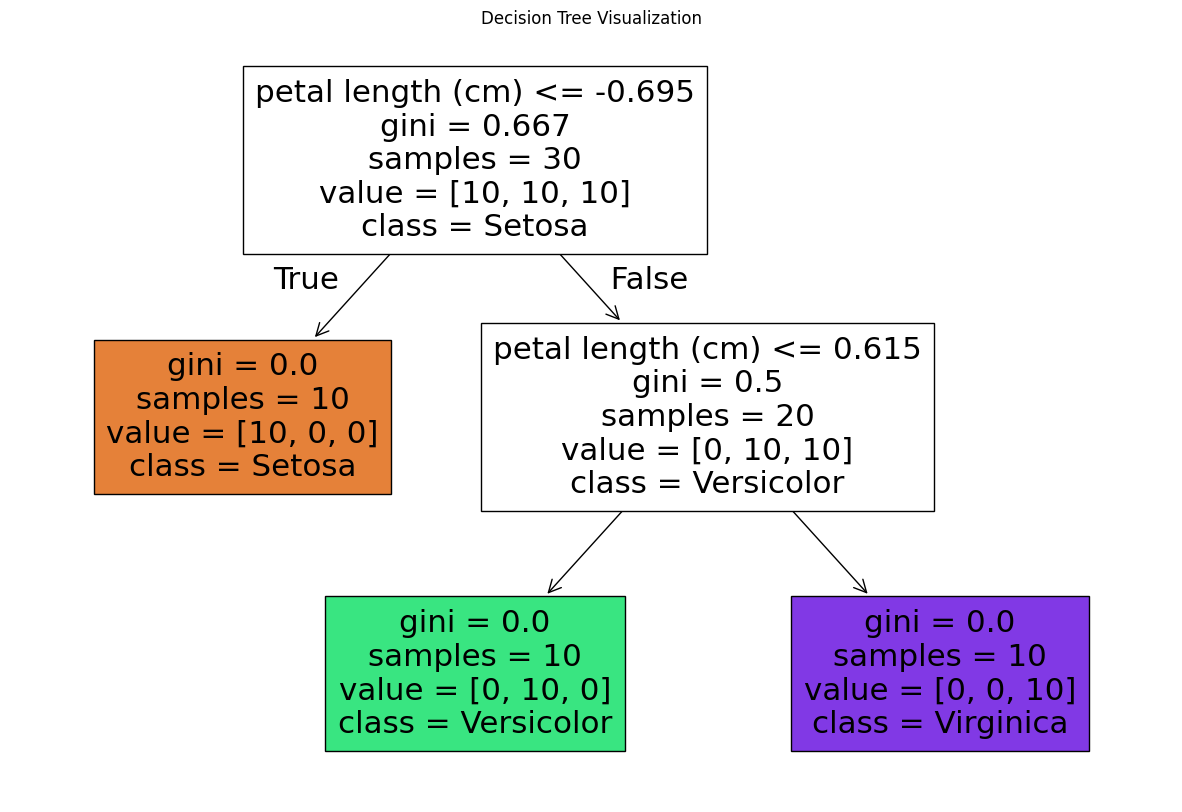

In [28]:
# Visualizing Decision Tree as an Example
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=["Setosa", "Versicolor", "Virginica"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()